# DV第12次作业 32019070233 张博强

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from plotnine import *
import seaborn as sns
from matplotlib import cm
from matplotlib import colors

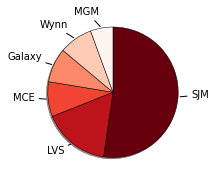

In [2]:
df = pd.DataFrame(dict(labels=['LVS', 'SJM', 'MCE', 'Galaxy', 'MGM', 'Wynn'], sizes=[
                  24.20, 75.90, 12.50, 12.30, 8.10, 12.10]))
df = df.sort_values(by='sizes', ascending=False)
df = df.reset_index()

cmap = cm.get_cmap('Reds_r', 6)
color = [colors.rgb2hex(cmap(i)[:3])for i in range(cmap.N)]
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(df['sizes'].values, startangle=90, shadow=True,
                       counterclock=False, colors=color, wedgeprops=dict(linewidth=0.5, edgecolor='k'))
for i, p in enumerate(wedges):
    ang = (p.theta2-p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(df['labels'][i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle='-'))

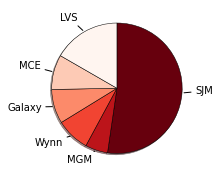

In [3]:
df=pd.DataFrame(dict(labels =['LVS','SJM','MCE','Galaxy','MGM','Wynn'],sizes=[24.20,75.90,12.50,12.30,8.10,12.10]))
df=df.sort_values(by='sizes',ascending=False)
df=df.reset_index()
index=np.append(0,np.arange(df.shape[0]-1,0,-1))
df=df.iloc[index,:]
df=df.reset_index()
cmap = cm.get_cmap('Reds_r', 6)
color = [colors.rgb2hex(cmap(i)[:3])for i in range(cmap.N)]
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(df['sizes'].values, startangle=90, shadow=True,
                       counterclock=False, colors=color, wedgeprops=dict(linewidth=0.5, edgecolor='k'))
for i, p in enumerate(wedges):
    ang = (p.theta2-p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(df['labels'][i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle='-'))

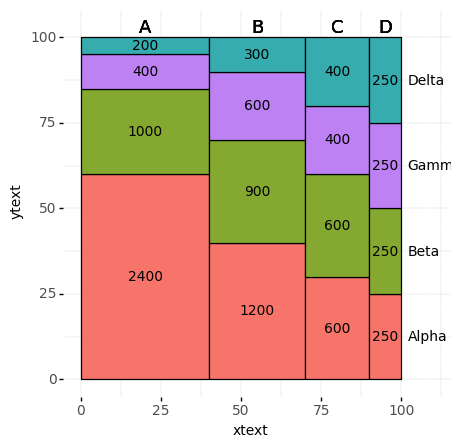

In [4]:
df = pd.DataFrame(dict(segment=["A", "B", "C", "D"], Alpha=[2400, 1200, 600, 250], Beta=[
                  1000, 900, 600, 250], Gamma=[400, 600, 400, 250], Delta=[200, 300, 400, 250]))
df = df.set_index('segment')
melt_df = pd.melt(df.reset_index(), id_vars=[
                  "segment"], var_name='variable', value_name='value')
df_rowsum = df.apply(lambda x: x.sum(), axis=1)
for i in df_rowsum.index:
    for j in df.columns:
        df.loc[i, j] = df.loc[i, j]/df_rowsum[i]*100
df_rowsum = df_rowsum/np.sum(df_rowsum)*100
df['xmax'] = np.cumsum(df_rowsum)
df['xmin'] = df['xmax']-df_rowsum
dfm = pd.melt(df.reset_index(), id_vars=[
              "segment", "xmin", "xmax"], value_name="percentage")
dfm['ymax'] = dfm.groupby('segment')['percentage'].transform(
    lambda x: np.cumsum(x))
dfm['ymin'] = dfm.apply(lambda x: x['ymax']-x['percentage'], axis=1)
dfm['xtext'] = dfm['xmin']+(dfm['xmax']-dfm['xmin'])/2
dfm['ytext'] = dfm['ymin']+(dfm['ymax']-dfm['ymin'])/2

dfm = pd.merge(left=melt_df, right=dfm, how="left", on=["segment", "variable"])
df_label = pd.DataFrame(dict(x=np.repeat(102, 4), y=np.arange(
    12.5, 100, 25), label=["Alpha", "Beta", "Gamma", "Delta"]))
base_plot = (ggplot() +
             geom_rect(aes(ymin='ymin', ymax='ymax', xmin='xmin', xmax='xmax', fill='variable'), dfm, colour="black") +
             geom_text(aes(x='xtext', y='ytext', label='value'), dfm, size=10) +
             geom_text(aes(x='xtext', y=103, label='segment'), dfm, size=13) +
             geom_text(aes(x='x', y='y', label='label'), df_label, size=10, ha='left') +
             scale_x_continuous(breaks=np.arange(0, 101, 25), limits=(0, 110)) +
             scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl') +
             theme(panel_background=element_blank(),
                   panel_grid_major=element_line(
                       colour="grey", size=.25, linetype="dotted"),
                   panel_grid_minor=element_line(
                       colour="grey", size=.25, linetype="dotted"),
                   text=element_text(size=10),
                   legend_position="none",
                   aspect_ratio=1.,
                   figure_size=(5, 5),
                   dpi=100
                   ))
print(base_plot)

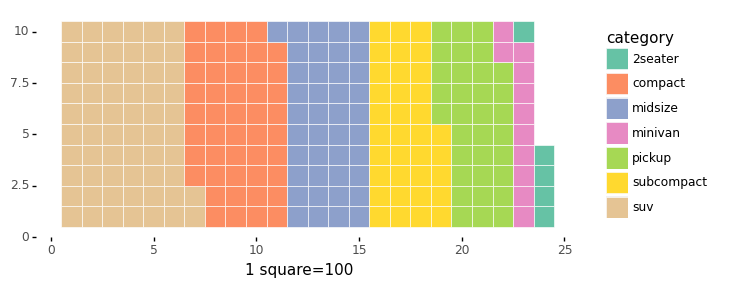

In [5]:
from plotnine.data import mpg
categ_table = (np.round(pd.value_counts(mpg['class']), 0)).astype(int)
sort_table = categ_table.sort_values(ascending=False)
ndeep = 10
a =np.arange(1, ndeep+1, 1)
b =np.arange(1, np.ceil(sort_table.sum()/ndeep)+1, 1)
X, Y = np.meshgrid(a, b)
df_grid= pd.DataFrame({'x':X.flatten(),'y': Y.flatten()})
category = np.repeat(sort_table.index, sort_table[:])
df_grid=df_grid.loc[np.arange(0, len(category)), :]
df_grid['category']=pd.Categorical(
    category, categories=sort_table.index, ordered=False)
base_plot=(ggplot(df_grid, aes(x ='y', y ='x', fill ='category')) +
geom_tile(color="white", size=0.25) +
coord_fixed(ratio=1) +
xlab("1 square=100") +
ylab("")+
scale_fill_brewer(type='qual', palette="Set2") +
theme(panel_background =element_blank(), legend_position ="right", figure_size=(7, 7), dpi =100))
print(base_plot)

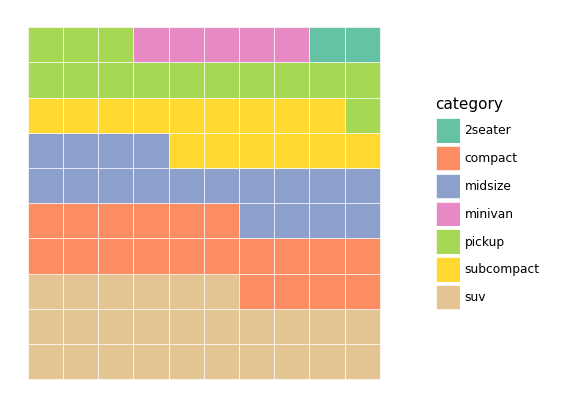

In [6]:
nrows = 10
categ_table = (np.round(pd.value_counts(
    mpg['class'])*((nrows*nrows)/(len(mpg['class']))), 0)).astype(int)
sort_table = categ_table.sort_values(ascending=False)
a = np.arange(1, nrows+1, 1)
b = np.arange(1, nrows+1, 1)
X, Y = np.meshgrid(a, b)
df_grid = pd.DataFrame({'x': X.flatten(), 'y': Y.flatten()})
df_grid['category'] = pd.Categorical(np.repeat(sort_table.index, sort_table[:]), categories=sort_table.index,
                                     ordered=False)
base_plot = (ggplot(df_grid, aes(x='x', y='y', fill='category')) +
             geom_tile(color="white", size=0.25) +
             coord_fixed(ratio=1) +
             scale_fill_brewer(type='qual', palette="Set2") +
             theme_void() +
             theme(panel_background=element_blank(), legend_position="right", aspect_ratio=1, figure_size=(5, 5),
                   dpi=100))
print(base_plot)

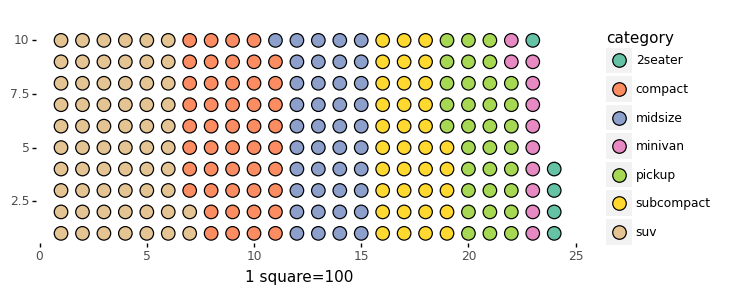

In [7]:
from plotnine.data import mpg
categ_table = (np.round(pd.value_counts(mpg['class']), 0)).astype(int)
sort_table = categ_table.sort_values(ascending=False)
ndeep = 10
a =np.arange(1, ndeep+1, 1)
b =np.arange(1, np.ceil(sort_table.sum()/ndeep)+1, 1)
X, Y = np.meshgrid(a, b)
df_grid= pd.DataFrame({'x':X.flatten(),'y': Y.flatten()})
category = np.repeat(sort_table.index, sort_table[:])
df_grid=df_grid.loc[np.arange(0, len(category)), :]
df_grid['category']=pd.Categorical(
    category, categories=sort_table.index, ordered=False)
base_plot=(ggplot(df_grid, aes(x ='y', y ='x', fill ='category')) +
geom_point(color="black",shape='o', size=5) +
coord_fixed(ratio=1) +
xlab("1 square=100") +
ylab("")+
scale_fill_brewer(type='qual', palette="Set2") +
theme(panel_background =element_blank(), legend_position ="right", figure_size=(7, 7), dpi =100))
print(base_plot)

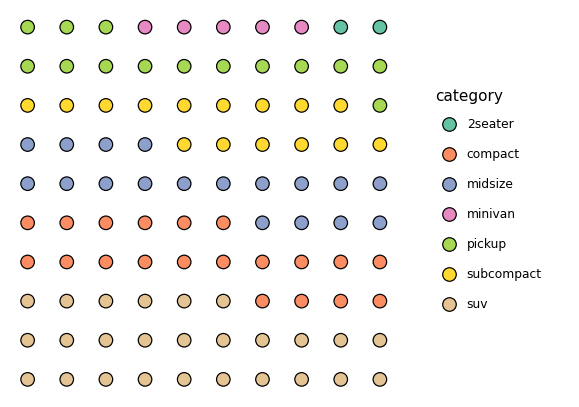

In [8]:
nrows = 10
categ_table = (np.round(pd.value_counts(
    mpg['class'])*((nrows*nrows)/(len(mpg['class']))), 0)).astype(int)
sort_table = categ_table.sort_values(ascending=False)
a = np.arange(1, nrows+1, 1)
b = np.arange(1, nrows+1, 1)
X, Y = np.meshgrid(a, b)
df_grid = pd.DataFrame({'x': X.flatten(), 'y': Y.flatten()})
df_grid['category'] = pd.Categorical(np.repeat(sort_table.index, sort_table[:]), categories=sort_table.index,
                                     ordered=False)
base_plot = (ggplot(df_grid, aes(x='x', y='y', fill='category')) +
             geom_point(color="black",shape='o', size=5) +
             coord_fixed(ratio=1) +
             scale_fill_brewer(type='qual', palette="Set2") +
             theme_void() +
             theme(panel_background=element_blank(), legend_position="right", aspect_ratio=1, figure_size=(5, 5),
                   dpi=100))
print(base_plot)